In [1]:
!git clone https://github.com/0nur0duncu/NeuroGraphT

Cloning into 'NeuroGraphT'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 2), reused 25 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 32.86 KiB | 570.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [29]:
# Git pull ve Python kernel'ı yenile
!git pull
import sys
import importlib

# models modülünü cache'ten temizle
if 'models' in sys.modules:
    del sys.modules['models']
    
# Alt modülleri de temizle
modules_to_delete = [key for key in sys.modules.keys() if key.startswith('models.')]
for module in modules_to_delete:
    del sys.modules[module]

print("✓ Git pull tamamlandı ve Python cache temizlendi")

Already up to date.
✓ Git pull tamamlandı ve Python cache temizlendi


In [2]:
%cd NeuroGraphT

/content/NeuroGraphT


In [3]:
# Gerekli kütüphaneleri yükle
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 91.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 148.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


In [4]:
# Sleep-EDF veri setini indir (otomatik)
from data.download import ensure_dataset
data_path = ensure_dataset(verbose=True)
print(f"Veri seti: {data_path}")

Veri seti indiriliyor: /content/dataset/sleep-edfx


İndiriliyor: 100%|██████████| 399/399 [02:14<00:00,  2.96it/s]


✓ İndirme tamamlandı: /content/dataset/sleep-edfx
Dosya yapısı:
  sleep-telemetry/ST7182JR-Hypnogram.edf
  sleep-telemetry/ST7011JP-Hypnogram.edf
  sleep-telemetry/ST7211J0-PSG.edf
  sleep-telemetry/ST7072J0-PSG.edf
  sleep-telemetry/ST7191J0-PSG.edf
  sleep-telemetry/ST7052J0-PSG.edf
  sleep-telemetry/ST7091J0-PSG.edf
  sleep-telemetry/ST7212J0-PSG.edf
  sleep-telemetry/ST7172JA-Hypnogram.edf
  sleep-telemetry/ST7151JA-Hypnogram.edf
  sleep-telemetry/ST7021J0-PSG.edf
  sleep-telemetry/ST7211JJ-Hypnogram.edf
  sleep-telemetry/ST7151J0-PSG.edf
  sleep-telemetry/ST7242J0-PSG.edf
  sleep-telemetry/ST7051JA-Hypnogram.edf
  sleep-telemetry/ST7202JO-Hypnogram.edf
  sleep-telemetry/ST7042J0-PSG.edf
  sleep-telemetry/ST7062JR-Hypnogram.edf
  sleep-telemetry/ST7012J0-PSG.edf
  sleep-telemetry/ST7171JA-Hypnogram.edf
  sleep-telemetry/ST7101JE-Hypnogram.edf
  sleep-telemetry/ST7221JA-Hypnogram.edf
  sleep-telemetry/ST7152J0-PSG.edf
  sleep-telemetry/ST7192JR-Hypnogram.edf
  sleep-telemetry/ST702

In [6]:
from data import load_sleep_edf_dataset, get_sleep_stage_name
import numpy as np

signals, labels, _ = load_sleep_edf_dataset(
    data_dir=data_path,
    max_subjects=5,  # Hızlı test için 5 özne
    verbose=True
)
print(f"\nSinyal şekli: {signals.shape}")
print(f"Her epoch: 30 saniye, 100 Hz = 3000 örnek")

✓ Veri seti mevcut: /content/dataset/sleep-edfx
Toplam 5 özne bulundu


Özneler yükleniyor:   0%|          | 0/5 [00:00<?, ?it/s]/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  20%|██        | 1/5 [00:04<00:17,  4.30s/it]/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  40%|████      | 2/5 [00:09<00:14,  4.83s/it]/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  60%|██████    | 3/5 [00:16<00:11,  5.79s/it]/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  80%|████████  | 4/5 [00:19<00:04,  4.58s/it]/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor: 100%|██████████| 5/5 [00:27<00:00,  5.55s/it]


Toplam 13933 epoch yüklendi
Sınıf dağılımı:
  W: 9469 (68.0%)
  N1: 412 (3.0%)
  N2: 2390 (17.2%)
  N3: 813 (5.8%)
  REM: 849 (6.1%)

Sinyal şekli: (13933, 1, 3000)
Her epoch: 30 saniye, 100 Hz = 3000 örnek


In [ ]:
# Model mimarisini test et
import torch
from models import NeuroGraphT, BaselineCNNTransformer

# Test input (batch=2, channel=1, samples=3000 for 30s at 100Hz)
test_input = torch.randn(2, 1, 3000)

# NeuroGraphT test
model = NeuroGraphT(num_classes=5)
output = model(test_input)
print(f"NeuroGraphT output shape: {output.shape}")

# Baseline test
baseline = BaselineCNNTransformer(num_classes=5)
output = baseline(test_input)
print(f"BaselineCNNTransformer output shape: {output.shape}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00


In [ ]:
# Checkpoint dizinini temizle (isteğe bağlı)
import shutil
import os
if os.path.exists("checkpoints"):
    shutil.rmtree("checkpoints")
    print("Checkpoints temizlendi.")
os.makedirs("checkpoints", exist_ok=True)

In [7]:
# Deneyleri çalıştır
# --max-subjects: Hızlı test için özne sayısını sınırla
# --num-runs: Her model için tekrar sayısı
# --channel: EEG kanalı (EEG Fpz-Cz veya EEG Pz-Oz)

!python run_all_experiments.py --num-runs 3 --max-subjects 10

Uyarı: torch_geometric bulunamadı. Manuel global max pool kullanılacak.
Cihaz: cuda

######################################################################
# Sleep-EDF Veri Seti Yükleniyor
# Kanal: EEG Fpz-Cz
######################################################################
Veri seti indiriliyor: dataset/sleep-edfx
İndiriliyor: 100% 399/399 [02:11<00:00,  3.03it/s]

✓ İndirme tamamlandı: dataset/sleep-edfx
Dosya yapısı:
  sleep-telemetry/ST7182JR-Hypnogram.edf
  sleep-telemetry/ST7011JP-Hypnogram.edf
  sleep-telemetry/ST7211J0-PSG.edf
  sleep-telemetry/ST7072J0-PSG.edf
  sleep-telemetry/ST7191J0-PSG.edf
  sleep-telemetry/ST7052J0-PSG.edf
  sleep-telemetry/ST7091J0-PSG.edf
  sleep-telemetry/ST7212J0-PSG.edf
  sleep-telemetry/ST7172JA-Hypnogram.edf
  sleep-telemetry/ST7151JA-Hypnogram.edf
  sleep-telemetry/ST7021J0-PSG.edf
  sleep-telemetry/ST7211JJ-Hypnogram.edf
  sleep-telemetry/ST7151J0-PSG.edf
  sleep-telemetry/ST7242J0-PSG.edf
  sleep-telemetry/ST7051JA-Hypnogram.edf
  sleep-te

In [8]:
# Sonuçları göster
import json

with open("results.json", "r") as f:
    results = json.load(f)

print("\n" + "="*60)
print("SONUÇLAR")
print("="*60)

for model_name, metrics in results["experiments"].items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.2f}% ± {metrics['accuracy_std']:.2f}%")
    print(f"  F1 Score: {metrics['f1']:.2f}% ± {metrics['f1_std']:.2f}%")


SONUÇLAR

CNN-Transformer:
  Accuracy: 93.49% ± 0.26%
  F1 Score: 80.34% ± 1.20%

1D-CNN-Transformer:
  Accuracy: 93.74% ± 0.12%
  F1 Score: 81.07% ± 0.51%

EpiGraphNet_DE(a=50):
  Accuracy: 93.66% ± 0.15%
  F1 Score: 80.28% ± 0.51%

EpiGraphNet_DE(a=25):
  Accuracy: 93.71% ± 0.36%
  F1 Score: 80.51% ± 0.48%

EpiGraphNet_BE(a=50):
  Accuracy: 93.50% ± 0.09%
  F1 Score: 79.94% ± 0.66%

EpiGraphNet_BE(a=25):
  Accuracy: 93.52% ± 0.33%
  F1 Score: 79.94% ± 0.99%


Uyarı: torch_geometric bulunamadı. Manuel global max pool kullanılacak.
Veri yükleniyor...


/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:88: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Model eğitiliyor (cuda)...
  Epoch 1/5 - Loss: 0.8731
  Epoch 2/5 - Loss: 0.4875
  Epoch 3/5 - Loss: 0.3061
  Epoch 4/5 - Loss: 0.2890
  Epoch 5/5 - Loss: 0.3956

Test ediliyor...


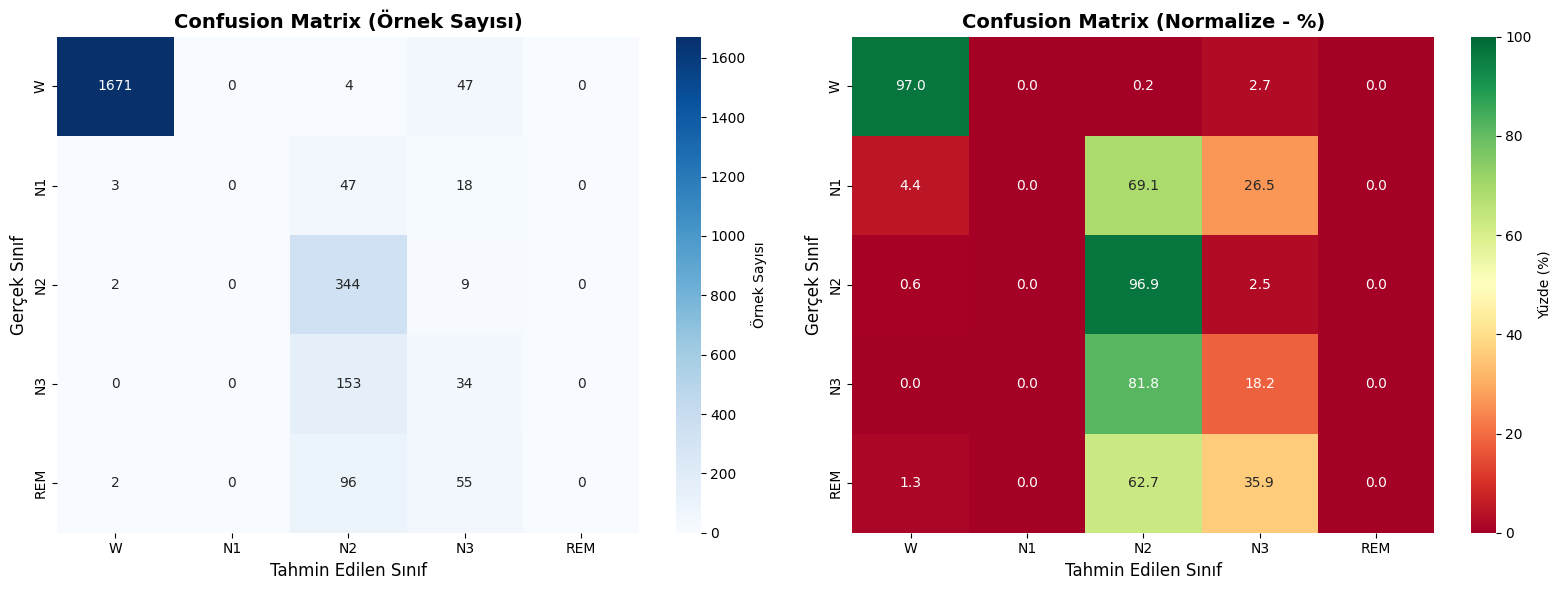


SINIF BAZINDA METRİKLER

    W: Precision=99.6%, Recall=97.0%, F1=98.3%

   N1: Precision=0.0%, Recall=0.0%, F1=0.0%

   N2: Precision=53.4%, Recall=96.9%, F1=68.9%

   N3: Precision=20.9%, Recall=18.2%, F1=19.4%

  REM: Precision=0.0%, Recall=0.0%, F1=0.0%

Genel Accuracy: 82.45%


In [30]:
# Confusion matrix görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from data import load_sleep_edf_dataset, SleepEDFDataset
from models import NeuroGraphT
import torch
from torch.utils.data import DataLoader
import numpy as np

# Veri setini yükle (küçük bir subset)
print("Veri yükleniyor...")
signals, labels, _ = load_sleep_edf_dataset(
    data_dir=data_path,
    max_subjects=3,
    verbose=False
)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    signals, labels, test_size=0.3, random_state=42, stratify=labels
)

# Model oluştur ve hızlı eğit
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuroGraphT(num_classes=5).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Hızlı eğitim (5 epoch)
print(f"Model eğitiliyor ({device})...")
train_loader = DataLoader(SleepEDFDataset(X_train, y_train), batch_size=64, shuffle=True)
model.train()
for epoch in range(5):
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"  Epoch {epoch+1}/5 - Loss: {loss.item():.4f}")

# Test ve tahmin
print("\nTest ediliyor...")
model.eval()
test_loader = DataLoader(SleepEDFDataset(X_test, y_test), batch_size=64, shuffle=False)
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

# Confusion matrix hesapla
cm = confusion_matrix(all_labels, all_preds)
stage_names = ['W', 'N1', 'N2', 'N3', 'REM']

# Normalize et (yüzde olarak)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Görselleştir
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Ham confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=stage_names, 
            yticklabels=stage_names, ax=ax1, cbar_kws={'label': 'Örnek Sayısı'})
ax1.set_xlabel('Tahmin Edilen Sınıf', fontsize=12)
ax1.set_ylabel('Gerçek Sınıf', fontsize=12)
ax1.set_title('Confusion Matrix (Örnek Sayısı)', fontsize=14, fontweight='bold')

# Normalize confusion matrix (%)
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='RdYlGn', xticklabels=stage_names,
            yticklabels=stage_names, ax=ax2, vmin=0, vmax=100, cbar_kws={'label': 'Yüzde (%)'})
ax2.set_xlabel('Tahmin Edilen Sınıf', fontsize=12)
ax2.set_ylabel('Gerçek Sınıf', fontsize=12)
ax2.set_title('Confusion Matrix (Normalize - %)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Sınıf bazında metrikler
print(f"\n{'='*60}")
print("SINIF BAZINDA METRİKLER")
print(f"{'='*60}")
for i, stage in enumerate(stage_names):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\n{stage:>5}: Precision={precision*100:.1f}%, Recall={recall*100:.1f}%, F1={f1*100:.1f}%")

accuracy = np.trace(cm) / cm.sum() * 100
print(f"\n{'='*60}")
print(f"Genel Accuracy: {accuracy:.2f}%")
print(f"{'='*60}")

In [ ]:
!python run_experiments_kfold.py --k-folds 5 --config config/config.yaml